Try to use Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive
%rm -f -r mlmech
! git clone https://github.com/jfra1397/mlmech.git
%cd mlmech

In [ ]:
!git checkout main
!git pull

Training starts here

In [9]:
import custom
import create_model
from importlib import reload

In [10]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


train, validation = CustomDataGenerator.generate_data(batch_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed)# ,single_img=single_img)
img_size = train.img_size
print(img_size)
mask_size = train.mask_size
print(mask_size)

Number of samples:  5443
Classes: [  0. 142. 255.]
Number of samples:  605
Classes: [  0. 142. 255.]
(256, 256, 3)
(256, 256)


-1.0
1.0
0.0
2.0
[  0. 142. 255.]


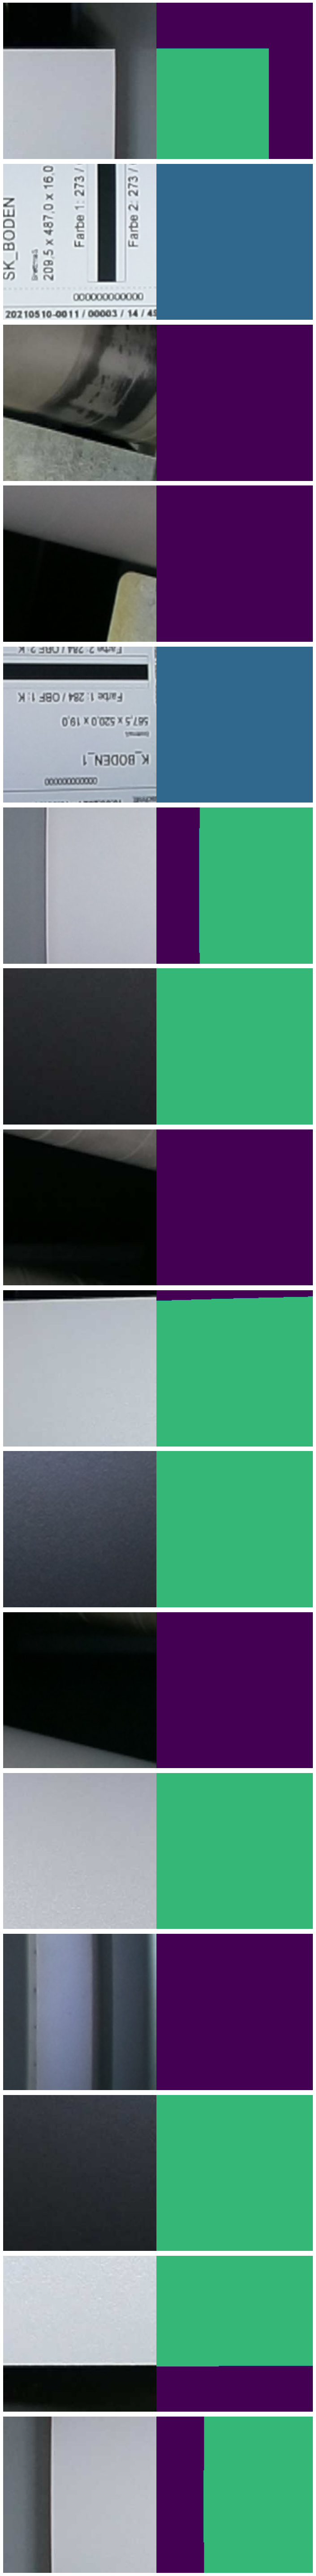

In [11]:
train.plot_batch(3)

img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

In [18]:
reload(custom)
from custom import *

reload(create_model)
from create_model import generate_model

import tensorflow.keras.losses as losses

model = generate_model(img_size)

model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [19]:
reload(custom)
from custom import *

history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/50
20/20 [==============================] - 263s 13s/step - loss: 0.8453 - accuracy: 0.6490 - val_loss: 0.9938 - val_accuracy: 0.9076
Epoch 2/50
20/20 [==============================] - 265s 14s/step - loss: 0.3774 - accuracy: 0.8825 - val_loss: 0.6324 - val_accuracy: 0.9260
Epoch 3/50
20/20 [==============================] - 247s 13s/step - loss: 0.2580 - accuracy: 0.9129 - val_loss: 0.3324 - val_accuracy: 0.9309
Epoch 4/50
20/20 [==============================] - 218s 11s/step - loss: 0.3455 - accuracy: 0.8814 - val_loss: 0.1743 - val_accuracy: 0.9677
Epoch 5/50
20/20 [==============================] - 224s 11s/step - loss: 0.2280 - accuracy: 0.9334 - val_loss: 0.1709 - val_accuracy: 0.9658
Epoch 6/50
20/20 [==============================] - 206s 10s/step - loss: 0.2231 - accuracy: 0.9312 - val_loss: 0.1246 - val_accuracy: 0.9729
Epoch 7/50
20/20 [==============================] - 233s 12s/step - loss: 0.1643 - accuracy: 0.9553 - val_loss: 0.1237 - val_accuracy: 0.9683
Epoch 

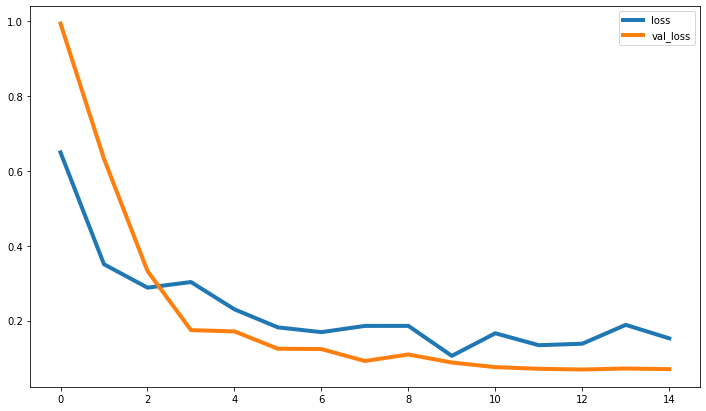

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

1/1 [==============================] - 7s 7s/step


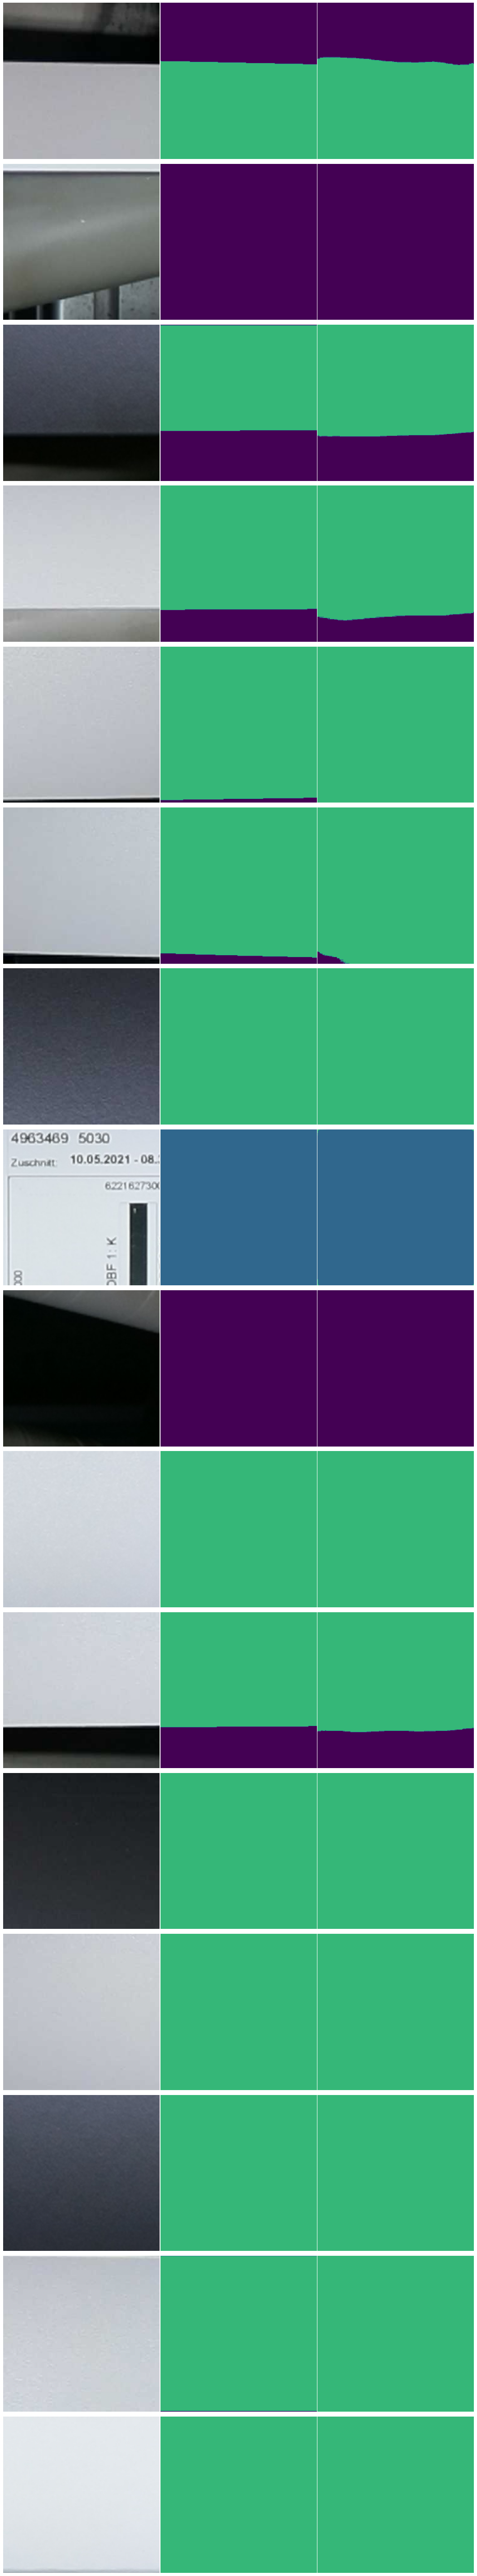

In [21]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)

In [22]:
reload(custom)
from custom import *

import pandas as pd
import os

os.mkdir(dir_name)

from shutil import copyfile
copyfile("custom.py", dir_name + "/custom.py")
copyfile("create_model.py", dir_name + "/create_model.py")


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = dir_name + '/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

#save model
model.save(dir_name + "/model.tf", include_optimizer = True)
model.save_weights(dir_name + "/weights.tf")

INFO:tensorflow:Assets written to: results/samuel/MobileNetV2_KerasModel/model.tf\assets
